# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='once')

In [2]:
import scipy as sp
import scipy.stats as stats
import sklearn

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
from matplotlib import rcParams
import matplotlib as mpl

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (10, 6),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.data.shape

(506, 13)

In [7]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [10]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

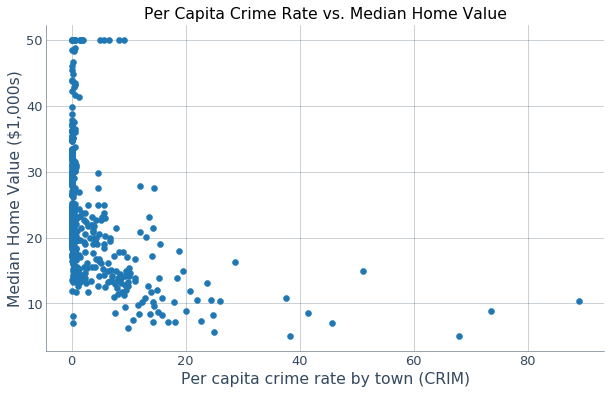

In [14]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Median Home Value ($1,000s)")
plt.title("Per Capita Crime Rate vs. Median Home Value");

***
<div class="alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>

<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [15]:
# Calculate Peason's R for each feature:

correlation = bos.corr()
correlation.iloc[[-1]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
PRICE,-0.385832,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


<div class="alert alert-success">
<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>
<ol>
    <li>Housing prices are capped at a median value of \$50,000. </li>   
    <li>This data is very old!  Capping median home values at \$50,000 is at least two orders of magnitude lower than what would be appropriate today.</li>
    <li>There is a negative correlation between home prices and crime per capita for median home values between \$15,000 and about \$30,000.  Above \$30,000, crime holds steadily low.  Below about \$15,000, crime rates are largely independent of house prices.</li>
    <li>There are some extreme outliers beyond a per capita crime rate of about 25, but they do not appear to be correlated to the median home value.</li>
</ol>

</div>

***
<div class="alert alert-info">
<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>
</div>

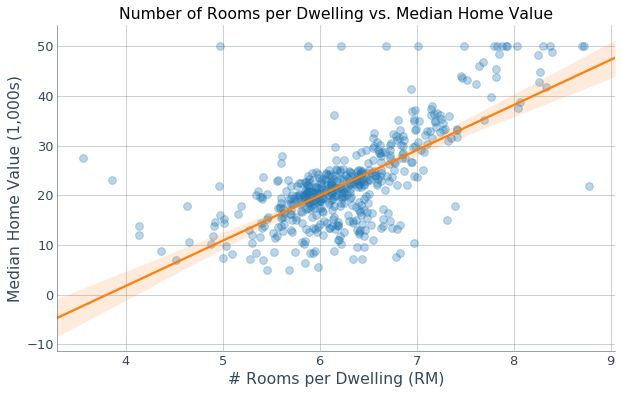

In [16]:
# reg plot: # Rooms v Median Home Value
sns.regplot(x='RM', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('# Rooms per Dwelling (RM)')
_ = plt.ylabel('Median Home Value (1,000s)')
_ = plt.title('Number of Rooms per Dwelling vs. Median Home Value');

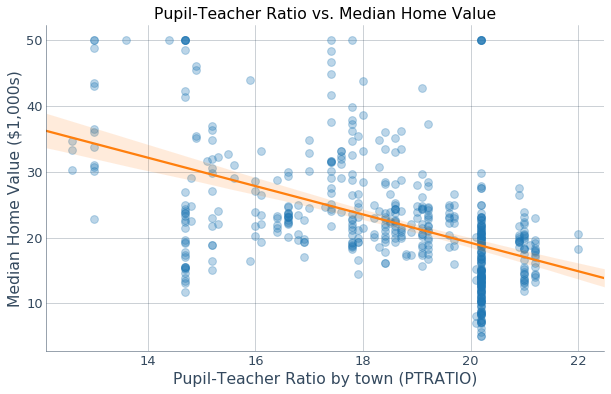

In [17]:
# reg plot: Pupil-Teacher Ratio vs. Median Home Value
sns.regplot(x='PTRATIO', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('Pupil-Teacher Ratio by town (PTRATIO)')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('Pupil-Teacher Ratio vs. Median Home Value');

<div class="alert alert-success">
<ol>
    <li>While there are outliers in each direction, there is a strong, positive correlation between the average number of rooms per dwelling and the median home price.</li>
    <li>There is a negative correlation between the pupil-teacher ratio and median home value; as the ratio grows larger, the median home values decrease.</li>
</ol>
</div>

***
<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

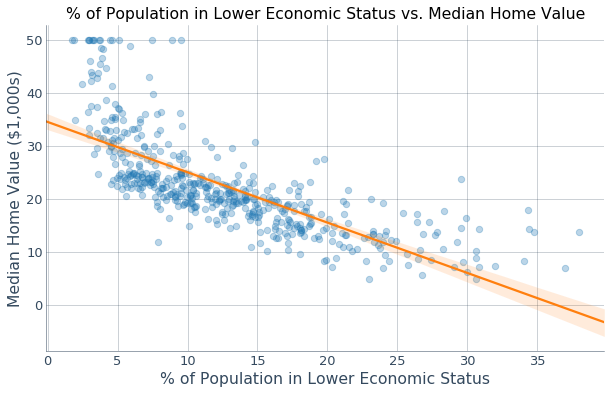

In [18]:
# reg plot: Economic Status vs. Median Home Value
sns.regplot(x='LSTAT', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':40}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('% of Population in Lower Economic Status')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('% of Population in Lower Economic Status vs. Median Home Value');

<div class="alert alert-success">
Unsurprisingly, there is a negative correlation between economic status and median housing price.  Median home values are lower in areas where larger percentages of the population are members of the lower economic classes.
</div>

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


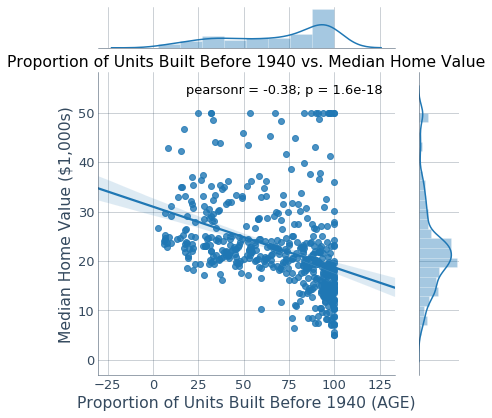

In [19]:
# jointplot: 
sns.jointplot('AGE', 'PRICE', data = bos, kind = 'reg', space=0.6)

_ = plt.xlabel('Proportion of Units Built Before 1940 (AGE)')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('Proportion of Units Built Before 1940 vs. Median Home Value');

<div class="alert alert-success">
There is a slight negative correlation between the median home values and the age of a town, where towns with larger percentages of older units have slightly lower median values.
</div>

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


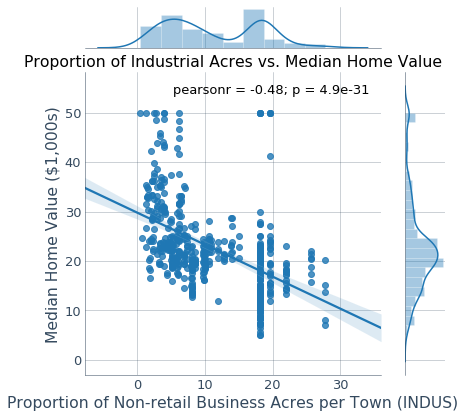

In [20]:
# jointplot: 
sns.jointplot('INDUS', 'PRICE', data = bos, kind = 'reg', space=0.6)

_ = plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('Proportion of Industrial Acres vs. Median Home Value');

<div class="alert alert-success">
There is a negative correlation between the median home values and the proportion of non-retail business space, where areas with larger percentages of non-retail business space have lower median values.
</div>

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


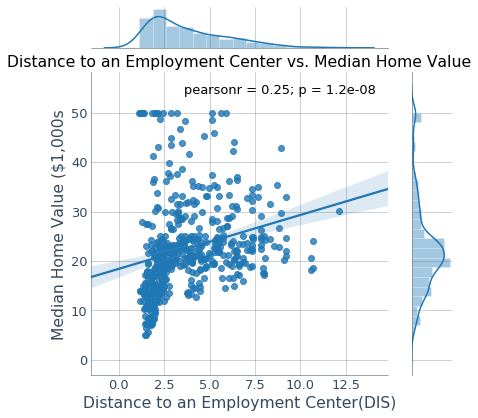

In [21]:
# jointplot: 
sns.jointplot('DIS', 'PRICE', data = bos, kind = 'reg', space=0.6)

_ = plt.xlabel('Distance to an Employment Center(DIS)')
_ = plt.ylabel('Median Home Value ($1,000s')
_ = plt.title('Distance to an Employment Center vs. Median Home Value');

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


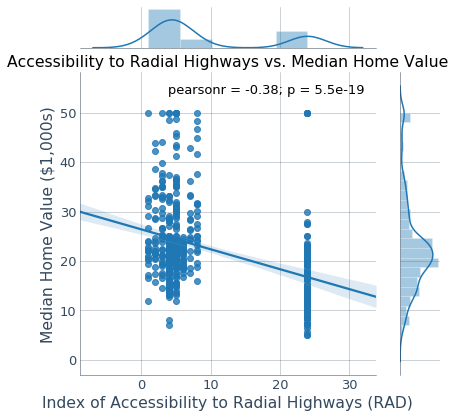

In [22]:
# jointplot: 
sns.jointplot('RAD', 'PRICE', data = bos, kind = 'reg', space=0.6)

_ = plt.xlabel('Index of Accessibility to Radial Highways (RAD)')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('Accessibility to Radial Highways vs. Median Home Value');

<div class="alert alert-success">
<p>There is a premium placed on homes closer to an employment center and/or with easier access to a radial highway.</p>
</div>

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

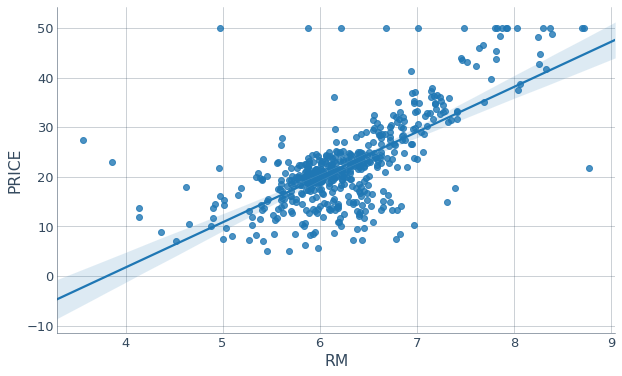

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True);

### Histograms
***


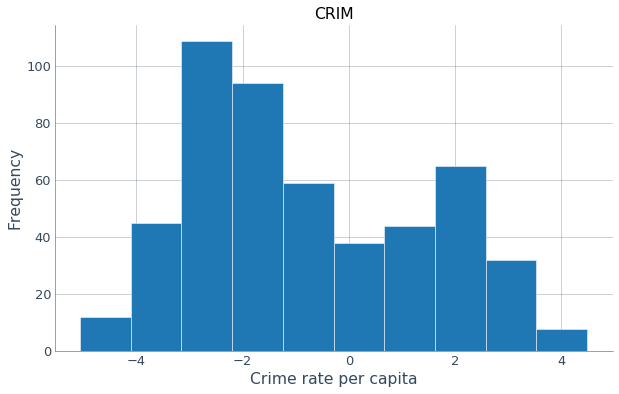

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show();

***
<div class="alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?
</div>

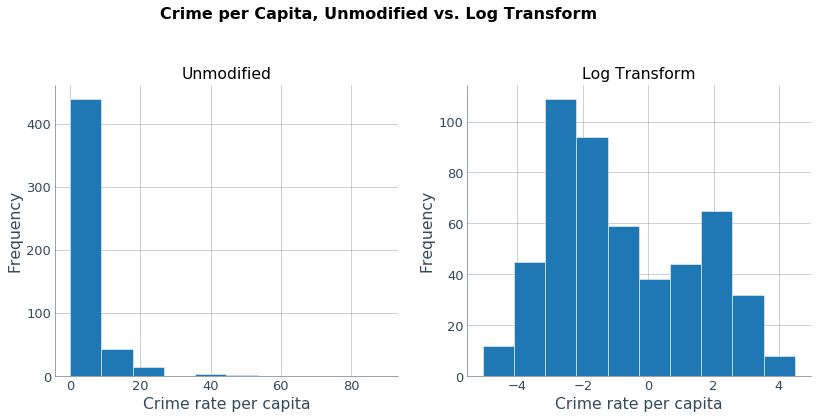

In [25]:
plt.subplots(1,2, figsize=(15,6))

plt.subplot(121)
plt.hist(bos.CRIM)
plt.title("Unmodified")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")

plt.subplot(122)
plt.hist(np.log(bos.CRIM))
plt.title("Log Transform")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")

plt.suptitle('Crime per Capita, Unmodified vs. Log Transform', fontsize=16)

plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show();

<div class="alert alert-success">
<p>Taking the log of the crime rate redistributes the data to give us a different perspective.  The transformed data spreads the data that was bunched at the low end of the unmodified histogram and reveals that the crime rate per capita is bimodal. </p>
</div>


<div class="alert alert-info">
<p><b>Exercise:</b> Plot histograms for *RM* and *PTRATIO*, along with the two variables you picked in the previous section.</p>
</div>

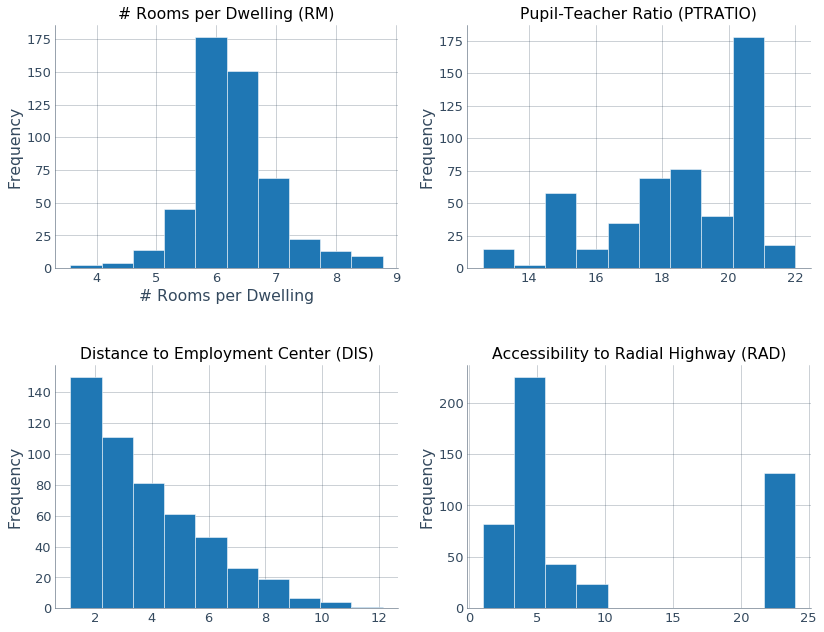

In [26]:
plt.subplots(2,2, figsize=(15,12))

plt.subplot(221)
plt.hist(bos.RM)
plt.title('# Rooms per Dwelling (RM)')
plt.xlabel('# Rooms per Dwelling')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(bos.PTRATIO)
plt.title('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(bos.DIS)
plt.title('Distance to Employment Center (DIS)')
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(bos.RAD)
plt.title('Accessibility to Radial Highway (RAD)')
plt.ylabel('Frequency')

plt.subplots_adjust(left=0.2, wspace=0.2, hspace=0.4, top=0.8)
plt.show();

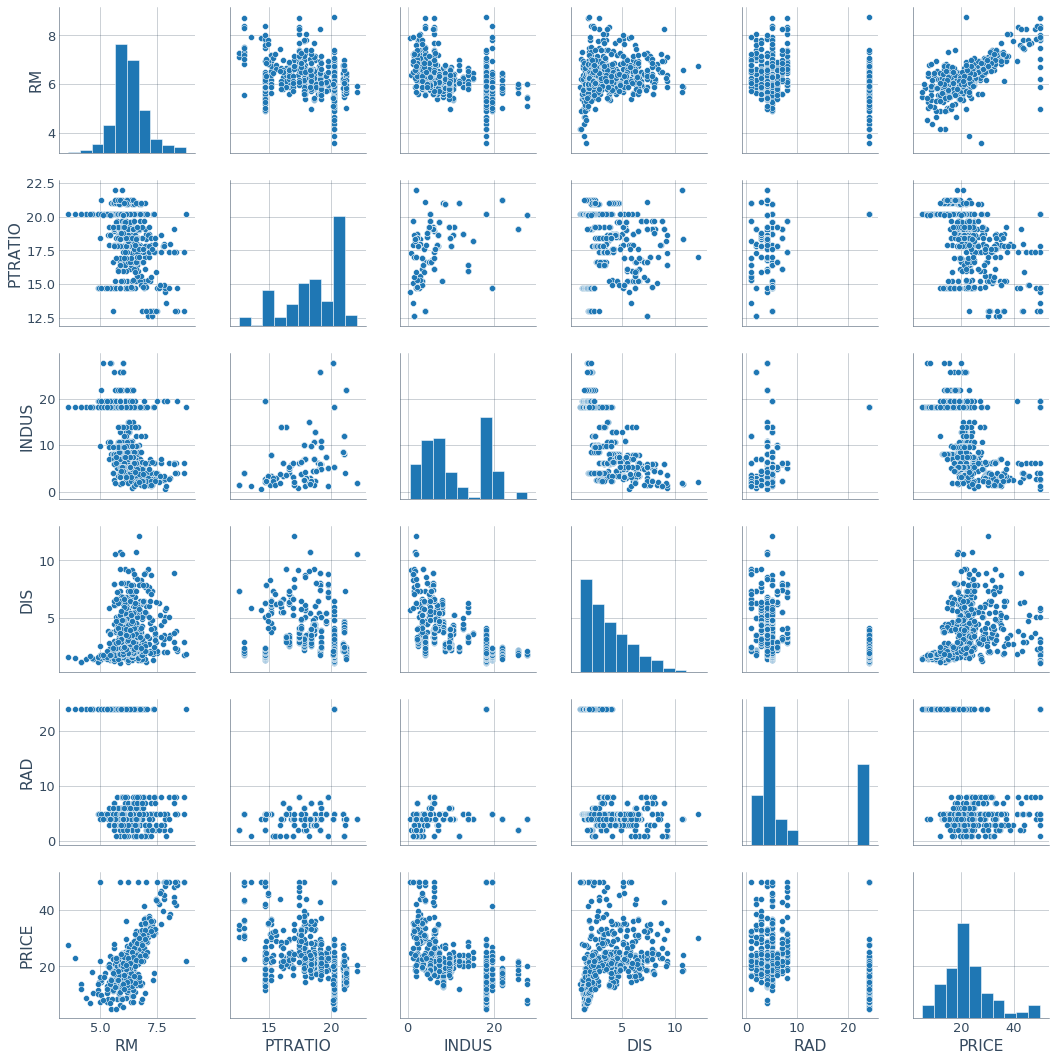

In [27]:
sns.pairplot(bos, vars=['RM', 'PTRATIO', 'INDUS', 'DIS', 'RAD', 'PRICE'])
plt.show();



## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.49e-74
Time:                        09:59:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call NumPy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

***
<div class="alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

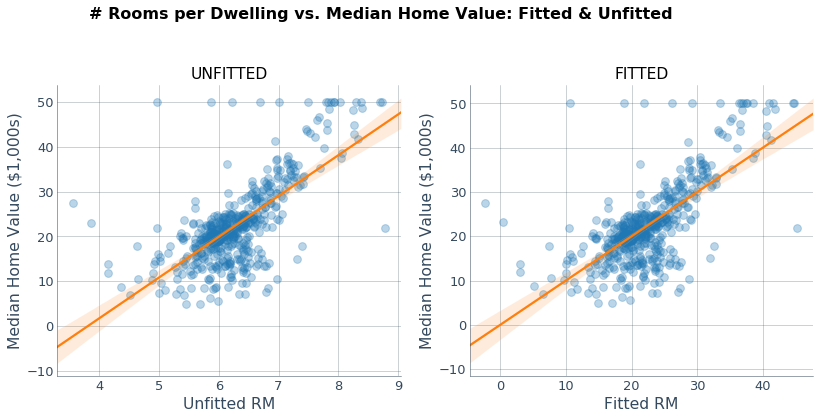

In [30]:
plt.subplots(1,2, figsize=(15,6))

plt.subplot(121)
sns.regplot(x='RM', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('Unfitted RM')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('UNFITTED')

plt.subplot(122)
sns.regplot(x=m.fittedvalues, y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('Fitted RM')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('FITTED')

plt.suptitle('# Rooms per Dwelling vs. Median Home Value: Fitted & Unfitted', fontsize=16)

plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show();

<div class="alert alert-success">
<p>The scale of the x axis has changed and no longer makes sense.  In the plot of fitted values, the number of rooms ranges between -3 and 55, but the plotted points all appear to be in the same places, relative to one another.</p>
</div>

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
# lm.<tab>


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 


### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)
lm.coef_
lm.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

36.49110328036135

***
<div class="alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>
</div>

<div class="alert alert-success">
<p>If the `fit_intercept` parameter is set to `False` upon initialization of a `LinearRegression` instance, no intercept will be used in calculations.</p>
</div>

<div class="alert alert-info">
<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>
</div>

<div class="alert alert-success">
In order to use OLS regression, the residuals must:
<ol>
    <li>be independent </li>
    <li>have constant variance </li>
    <li>be normally distributed </li>
</ol>
IID refers to the first two criteria.  Residuals that are normally distributed may not necessarily be independent or have constant variance.
</div>

False -- $Y$ does not need to be normally distributed to use linear regression.  In order to make inferences about the regression parameters, it is adequate to know that the regression coefficient estimates are consistent and asymptotically normal. Confidence intervals for parameter estimates can be obtained using normality, even if the response is not normally distributed, as long as the sample size is in the asymptotic region ("large enough").

<div class="alert alert-info">
<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>

<div class="alert alert-success">
<p>False.  $Y$ does not need to be normally distributed to use linear regression.  In order to make inferences about the regression parameters, it is adequate to know that the regression coefficient estimates are consistent and asymptotically normal. Confidence intervals for parameter estimates can be obtained using normality, even if the response is not normally distributed, as long as the sample size is in the asymptotic region ("large enough").  

There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:
<ol>
    <li>linearity and additivity of the relationship between dependent and independent variables: </li>
        <ol>
            <li>The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed. </li>
            <li>The slope of that line does not depend on the values of the other variables. </li>
            <li>The effects of different independent variables on the expected value of the dependent variable are additive. </li>
        </ol>
    <li>statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data) </li>
    <li>homoscedasticity (constant variance) of the errors </li>
        <ol>
            <li>versus time (in the case of time series data) </li>
            <li>versus the predictions </li>
            <li>versus any independent variable </li>
        </ol>
    <li>normality of the error distribution. </li>
    
</ol>

</div>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036135


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

***
<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

</div>

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


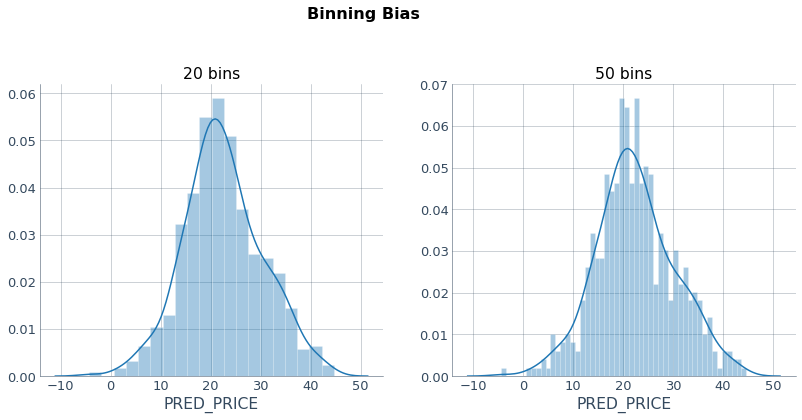

In [38]:
bos['PRED_PRICE'] = lm.predict(X)

plt.subplots(1,2, figsize=(15,6))

plt.subplot(121)
sns.distplot(bos['PRED_PRICE'], bins=20)
_ = plt.title('20 bins')

plt.subplot(122)
sns.distplot(bos['PRED_PRICE'], bins=50)
_ = plt.title('50 bins')

plt.suptitle('Binning Bias', fontsize=16)

plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show();

In [39]:
preds = bos.PRED_PRICE

preds.describe()

count    506.000000
mean      22.532806
std        7.914896
min       -4.283009
25%       17.447270
50%       22.120625
75%       27.412587
max       44.673399
Name: PRED_PRICE, dtype: float64

<div class="alert alert-info">
<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>
</div>

<div class="alert alert-success">
<p>Both versions of the histogram for predicted prices are asymptotic, with a mean of \$22,532 and a median of \$22,120; slightly right-skewed.  The hist with 50 bins makes the negative outliers more apparent, and the `.describe()` verifies that the minimum predicted price is -\$4,283.  Predicted prices that are negative do not make sense.  We should look more closely to see if we can resolve or eliminate these predictions.</p>
</div>

<div class="alert alert-info">
<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see whether they disagree (we did this with `statsmodels` before).</p>
</div>

In [40]:
m = ols('PRICE ~ PRED_PRICE',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1439.
Date:                Tue, 29 May 2018   Prob (F-statistic):          8.56e-150
Time:                        09:59:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3002.
Df Residuals:                     504   BIC:                             3010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.757e-14      0.630  -9.14e-14      1.0

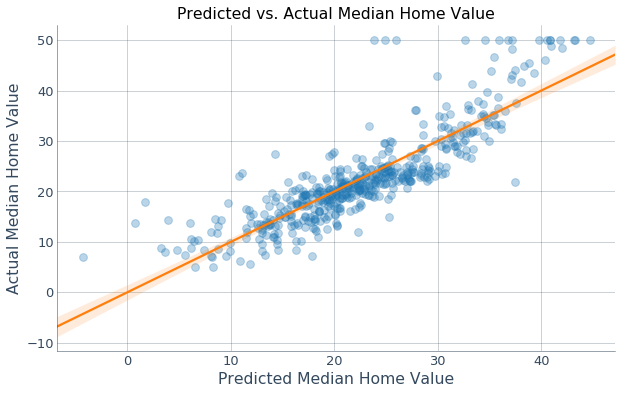

In [41]:
# reg plot: Predicted vs. Actual Median Home Value
sns.regplot(x='PRED_PRICE', y='PRICE', data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('Predicted Median Home Value')
_ = plt.ylabel('Actual Median Home Value')
_ = plt.title('Predicted vs. Actual Median Home Value');

<div class="alert alert-info">
<p><p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p> </p>
</div>

<div class="alert alert-success">
<p>`Scikit-learn` provides a better picture of all of the data points, while `statsmodels` provides many precise measures in a single method call. </p>
</div>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [42]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [43]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.11966625339713e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

***
<div class="alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>
<p>Let's look at the relationship between `PTRATIO` and housing price.</p>
</div>


<div class="alert alert-info">
<p><b>Exercise:</b> Make a scatterplot of `PTRATIO` and housing price. Tell a story about the relationship between the variables.</p>
</div>


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


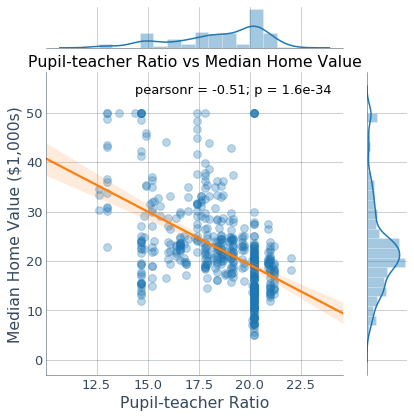

In [44]:
# joint plot: PTRATIO vs PRICE
sns.jointplot('PTRATIO', 'PRICE', data=bos, 
              kind='reg', 
              space=0.6,
              scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
              line_kws={'color': 'C1'})

_ = plt.xlabel('Pupil-teacher Ratio')
_ = plt.ylabel('Median Home Value ($1,000s)')
_ = plt.title('Pupil-teacher Ratio vs Median Home Value');

<div class="alert alert-info">
<p>There is a strong negative correlation between the teacher-pupil ratio and median home value; as the number of students per teacher increases, the median home value decreases, indicating that schools in poorer towns have larger class sizes.</p>
</div>

<div class="alert alert-info">
<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>
<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>
<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>
<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [45]:
m_2 = ols('PRICE ~ PTRATIO',bos).fit()
m_2.summary()

print('\n\nR^2: {}'.format(m_2.rsquared))
print('F-statistic: {}'.format(m_2.fvalue))
#print('t-statistic^2: {}'.format(m_2.tvalues[['PTRATIO', 'DIS', 'AGE']]**2))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.61e-34
Time:                        09:59:27   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



R^2: 0.257847318009223
F-statistic: 175.1055428756955


<div class="alert alert-success">
<p>__Intercept & Coefficients__: There is a negative correlation between median home value and the pupil-teacher ratio; for every student added to the numerator of the pupil-teacher ratio there is an sverage decrease of approximately $2,157 (\$1,000 x -2.1572).  Samples taken in a similar fashion will result in y-intercepts between \$56,393 and \$68,296 95\% of the time.</p>

<p>__$R^2$__: The $R^2$ statistic is one of two measures of the quality of a linear regression fit, the other being $RSE$, or Residual Standard Error.  $R^2$ measures the proportion of variability in Y that can be explained using X.  $R^2$ is always between 0 and 1 and is independent of the scale of Y.  As the $R^2$ value approaches 1, it indicates that a large proportion of the variability in the response has been explained by the regression.  A number closer to 0 indicates that the regression did not explain much of the variability in the response; this might occur because the model is wrong, or the inherent error $\sigma^2$ is high, or both.  The $R^2$ value of 0.258 indicates that just over 25% of the variability in median home value is explained by the variability in the pupil-teacher ratio.</p> 

<p>__$F$-statistic & $t$-statistic__: The $F$-statistic measures whether there is a relationship between the response and the predictors.  If the $F$-statistic takes on a value close to 1, it indicates that the null hypothesis is true and that there is no relationship between the predictors and the response.  If the $F$-statistic is greater than 1, it indicates that $H_a$ is true, and that there is a relationship between the predictors and the response.  Here, our $F$-statistic of 175 is much greater than 1, and indicates that there is a relationship between the pupil-teacher ratio and the median home value.
$$H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$$
    
$$H_a:\ at\ least\ one\ \beta_j \ne 0$$
</p>  


</div>

## 1 - 3-4


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [46]:
# your turn
pt = ols("PRICE ~ PTRATIO", bos).fit()
print('Intercept:',pt.params[0],'and Coefficient:', pt.params[1])

Intercept: 62.34462747483265 and Coefficient: -2.1571752960609656


This model suggests that when PTRATIO is 0 (impossible), the average housing price is 62. Every unit increase in PTRATIO lowers the average housing price by 2.15.

In [47]:
print('R^2 is :', pt.rsquared)

R^2 is : 0.257847318009223


This tells me that the model is only explaining 25% of the variance in the outcome variable.

In [48]:
# compute f-statistic
r = pt.rsquared
f = (r/(1-r))*((len(bos.PRICE)-2)/1)
print('F-statistic is:', f, '. Alternatively, we could just extract from the model - ', pt.fvalue)

F-statistic is: 175.10554287569548 . Alternatively, we could just extract from the model -  175.1055428756955


Because the f-statistic is the ratio of variance in the model (mean square difference between $\hat{y}_i$ and $\bar{y}_i$)
to the variance of the errors (mean square difference between $\hat{y}_i$ and $y_i$) - this value shows that there is much more variance in the model than in the errors.

In [49]:
pt.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.256    
Dependent Variable: PRICE            AIC:                3533.5908
Date:               2018-05-29 09:59 BIC:                3542.0439
No. Observations:   506              Log-Likelihood:     -1764.8  
Df Model:           1                F-statistic:        175.1    
Df Residuals:       504              Prob (F-statistic): 1.61e-34 
R-squared:          0.258            Scale:              62.901   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     62.3446    3.0292   20.5814  0.0000  56.3933  68.2960
PTRATIO       -2.1572    0.1630  -13.2327  0.0000  -2.4775  -1.8369
------------------------------------------------------------------
Omnibus:              92.924       Durbin-Watson:          0.725  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       191.444
Skew:                 1.001        Prob(JB):               0.000  
Kurtosis:             5.252        Condition No.:          160    
==================================================================

"""

The F-statistic for the model is the square of the t-statistic for the slope coefficient.

In [50]:
pt.tvalues[1]**2

175.10554287569533

## 2 3-4

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [51]:
# your turn
lm2 = LinearRegression()

pt = X.PTRATIO.values.reshape(-1,1)

lm2.fit(pt, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(lm2.coef_[0])
print(lm2.intercept_)

-2.1571752960609656
62.34462747483266


1\. The model predicts that when the pupil-teacher ratio goes up by 1, housing price will decrease by \$2157. A town with 0 pupils per teacher will have an median housing price of \$62,345.

In [53]:
r_squared = lm2.score(pt, bos.PRICE)
print(r_squared)

0.257847318009223


2\. The $R^2$ value is 0.2578. This model explains 25% of the variance in housing price. This means that the model's explanatory power is not very high, and its predictions will not necessarily be accurate.

In [54]:
F = (r_squared/(1-r_squared)) * ((506 - 1 - 1)/ 1)
print(F)

175.10554287569548


In [55]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.61e-34
Time:                        09:59:27   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

3\. The F-statistic is 175.1. The corresponding p-value is 1.61e-34, which means that we can reject the null hypothesis that there is no relationship between housing price and pupil-teacher ratio.

4\. The F-statistic is the square of the t-statistic for the PTRATIO coefficient.

## 3 3-4


-------------
### Answers:

- Calculate (or extract) the  R2  value. What does it tell you?

0.25. The coefficient of determination,  R2 , tells us the percentage of the variance in the response variable Y  that can be explained by the linear regression model. The closer to one, the better the model.

- Compute the  F-statistic. What does it tell you?

The value of Prob (F) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero)

The F-statistic must be used in combination with the p-value when you are deciding if your overall results are significant. If you have a significant result, it doesn’t mean that all your variables are significant. The statistic is just comparing the joint effect of all the variables together.

For example, if you are using the F-statistic in regression analysis (perhaps for a change in R Squared, the Coefficient of Determination), you would use the p-value to get the “big picture.” Study the individual p-values to find out which of the individual variables are statistically significant.


- Take a close look at the  F-statistic and the  t-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.

An F-statistic is a value you get when you run an ANOVA test or a regression analysis to find out if the means between two populations are significantly different. It’s similar to a t-statistic from a t-test; a t-test will tell you if a single variable is statistically significant and an F-test will tell you if a group of variables are jointly significant.


http://www.jerrydallal.com/lhsp/regout.htm

------------

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'Pupil-teacher ratio by town')

Text(0,0.5,'Housing Price')

Text(0.5,1,'Relationship between PTRATIO and Price')

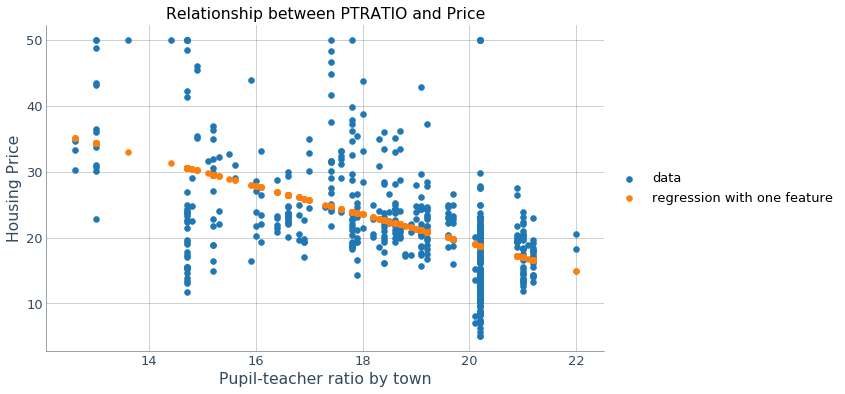

In [56]:
# linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)
xx = bos.PTRATIO.values.reshape(-1, 1) 
yy = bos.PRICE.values.reshape(-1, 1)
lm3 = LinearRegression()
lm3.fit(xx,yy)
plt.scatter(xx, yy, label='data')
plt.scatter(bos.PTRATIO, lm3.predict(xx), label='regression with one feature')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [57]:
# intercept and linear coefficient using sklearn
print('Estimated intercept coefficient: {}'.format(lm3.intercept_))
print('Estimated linear coefficient: {}'.format(lm3.coef_))

Estimated intercept coefficient: [62.34462747]
Estimated linear coefficient: [[-2.1571753]]


In [58]:
# R^2 score (coefficient of determination) using sklearn: the closer to 1 the better
sklearn.metrics.r2_score(yy, lm3.predict(xx), sample_weight=None, multioutput='uniform_average')

0.257847318009223

In [59]:
# use statsmodels to drive F-statistics
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.61e-34
Time:                        09:59:27   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [60]:
m_3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m_3.summary()

m_3.rsquared
m_3.fvalue

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.09e-97
Time:                        09:59:27   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.5934141551136979

244.22387023858764

<div class="alert alert-success">
<p>__F-statistic__: The $F$-statistic (244.2) is much greater than 1, indicating that there is a relationship between the predictors and the response.</p>
<p>__$R^2$__: The $R^2$ value of 0.593 indicates that these three factors account for 59% of the variability in the response has been explained by the regression using these three variables.</p>
<p>The p-values of all three features are 0, indicating that all three are statistically-significant.  The strongest correlation between one of these features and median home value is RM.  It is a postive correlation, and it indicates that for each additional unit of RM, the median home value increases by \$7,381.  PTRATIO has the next highest correlation and it is negative.  For each additional pupil per teacher, the median home value decreases by \$1,074.  CRIM also has a negative correlation, and for each unit of increase in CRIM, the median house value would decrease by \$202.10.  </p>
</div>

# 1 3-5

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [61]:
# your turn
mult_reg = ols("PRICE ~ CRIM + RM + PTRATIO", bos).fit()

In [62]:
mult_reg.fvalue

244.22387023858764

This f-statistic is higher than the simple linear regression, which means one of three things: 
1. The variance of this model is higher.
2. The variance of the residuals for this model is lower.
3. Both.

In [63]:
mult_reg.rsquared_adj

0.5909843592279231

This is higher than the previous $R^2$, even adjusting for the additional predictors, which means this model is explaining more of the variance in the outcome variable than the previous one.

In [64]:
mult_reg.params

Intercept   -3.306617
CRIM        -0.202110
RM           7.381567
PTRATIO     -1.074187
dtype: float64

It is important to note that these predictors were not scaled, so it is not safe to look at their values blindly as levels of significance. We know from earlier EDA that RM values occur over a much smaller range than CRIM and PTRATIO. If we look at the t-values...

In [65]:
mult_reg.tvalues

Intercept    -0.818840
CRIM         -6.301420
RM           18.360300
PTRATIO      -8.081087
dtype: float64

... We see that not only does RM have a large coefficient, but it has a large t-value, which is expressed in units of standard deviation and thus independent of scale. This means that having more rooms on average significantly raises the value of houses in a neighborhood. But more rooms (in units of SD) are not seven times more valuable than a higher PTRATIO is detrimental, as the coefficients would suggest.

Looking at the t-values also shows that per capita crime and student-teacher ratio have close to the same effect per unit of standard deviation.

# 2 3-5

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [66]:
lm3 = LinearRegression()

lm3.fit(X[['RM', 'PTRATIO', 'CRIM']], bos.PRICE)

print(lm3.coef_)
print(lm3.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 7.3815667  -1.0741868  -0.20210971]
-3.306617132406455


These coefficients mean that when the average number of rooms per dwelling increases by 1, the predicted median housing price increases by \$7,382; when the pupil-teacher ratio increases by 1, the median housing price decreases by \$1,074, and when the per capita crime rate increases by 1, the median housing price decreases by \$202.

In [67]:
m3 = ols('PRICE ~ CRIM + PTRATIO + RM',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.09e-97
Time:                        09:59:27   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

The F-statistic has a value of 244.2, with a corresponding p-value of $1.09*10^{-97}$. We can reject the null hypothesis that all of the coefficients are zero, and conclude that there is a relationship between housing price and at least one of the explanatory variables.

The $R^{2}$ value is 0.593, meaning that the model explains 59% of the variance in housing price.

According to the summary, all of the explanatory variables have a statistically significant relationship with housing price, with p-values < 0.001. Thus, a larger average number of rooms per dwelling is associated with higher housing prices, a higher ratio of pupils to teachers predicts lower housing prices, and an increased crime rate predicts lower housing prices.

# 3 3-5

-------
### Answers: (need help)

- Compute or extract the  F-statistic. What does it tell you about the model?

The P value for the F-test of overall significance test is less than our significance level (0.05), so we can reject the null-hypothesis and conclude that our model provides a better fit than the intercept-only model.

- Compute or extract the  R2 statistic. What does it tell you about the model?

R2: 0.59. R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression line approximates the real data points. An R2 of 1 indicates that the regression line perfectly fits the data.

- Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

All three variables are significant in predicting the price since the P value for all three is essentially zero. RM is the most significant predictor with the largest coefficient, followed by PTRATIO.

--------

In [68]:
# Fit a linear regression model using three independent variables
m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.09e-97
Time:                        09:59:27   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

Text(0.5,0,'Pupil-teacher ratio by town')

Text(0,0.5,'Housing Price')

Text(0.5,1,'Relationship between PTRATIO and Price')

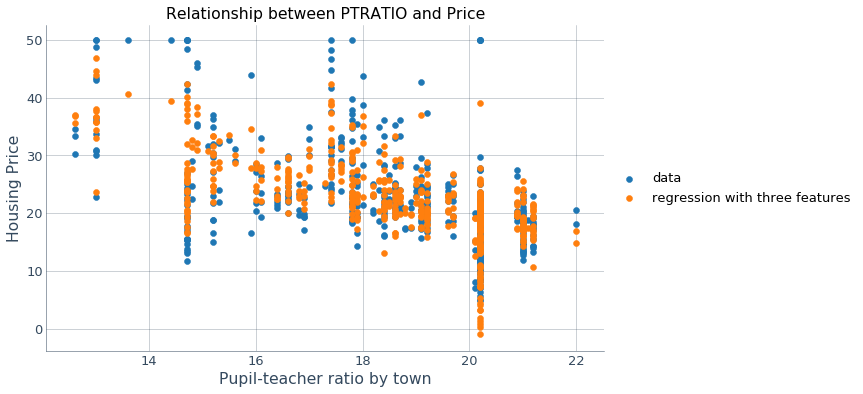

In [69]:
# look at the scatter plots
plt.scatter(bos.PTRATIO, bos.PRICE, label='data')
plt.scatter(bos.PTRATIO, m3.fittedvalues, label='regression with three features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Text(0.5,0,'Number of Rooms')

Text(0,0.5,'Housing Price')

Text(0.5,1,'Relationship between RM and Price')

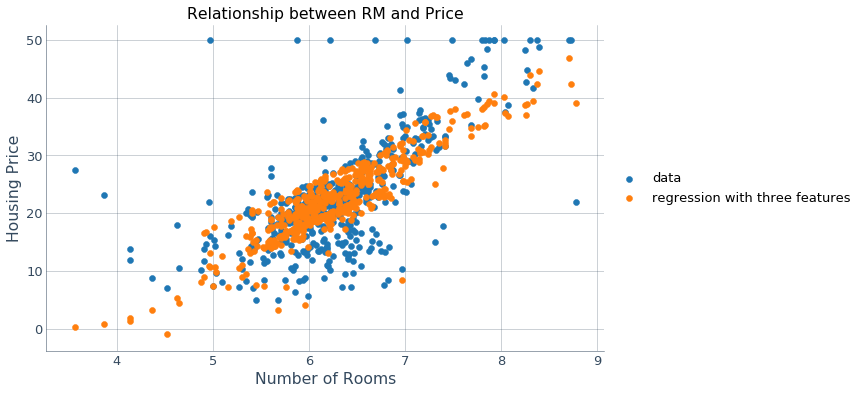

In [70]:
# look at the scatter plots
plt.scatter(bos.RM, bos.PRICE, label='data')
plt.scatter(bos.RM, m3.fittedvalues, label='regression with three features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [71]:
m_4 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT', bos).fit()
m_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 29 May 2018   Prob (F-statistic):          1.25e-126
Time:                        09:59:27   Log-Likelihood:                -1539.3
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9708      4.079      5.632      0.000      14.957      30.984
CRIM          -0.0903      0.031     -2.953      0.003      -0.150      -0.030
RM             4.3254      0.422     10.250      0.000       3.496       5.154
PTRATIO       -0.9227      0.116     -7.925      0.000      -1.151      -0.694
DIS           -0.6192      0.128     -4.836      0.000      -0.871      -0.368
LSTAT         -0.6258      0.048    -12.956      0.000      -0.721      -0.531
==============================================================================
Omnibus:                      182.217   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.152
Skew:                           1.559   Prob(JB):                    8.84e-176
Kurtosis:                       8.340   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from statsmodels.stats.anova import anova_lm

results = anova_lm(m_3, m_4)
results

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,17367.841062,0.0,NaN,NaN,NaN
1,500.0,13002.158527,2.0,4365.682535,83.941496,3.693220e-32


<div class="alert alert-success">
<p>The second model is slightly better.  Adding DIS and LSTAT to the regression equation results in an additional 10% of the variation being accounted for, and the AIC drops from 3233 to 3091.</p>
</div>

# 1 4

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [73]:
# create model, adding one new predictor - LSTAT
full_reg = ols("PRICE ~ CRIM + RM + PTRATIO + LSTAT", bos).fit()

# compute f-statistic
rss_reduced = mult_reg.ssr
rss_full = full_reg.ssr
df_reduced = mult_reg.df_resid
df_full = full_reg.df_resid
f = ((rss_reduced - rss_full)/(df_reduced - df_full))/(rss_full/df_full)
print('F-statistic is:', f)

# extract AIC's
print('The AIC for the reduced model is:', mult_reg.aic, '\nAIC for the full model:', full_reg.aic)

F-statistic is: 138.31297267330325
The AIC for the reduced model is: 3233.1002744570037 
AIC for the full model: 3111.743537106962


The F-Statistic shows that the full model explains more of the variance. Because the full model always has a smaller df than the reduced, the F-statistic will always be positive when the sum of square residuals is greater in the reduced model than in the full. The higher the value of the f-statistic the greater that difference is in units of MSR (mean square error) for the full model.

The lower AIC value for the full model further confirms this.

# 2 4

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

I will fit a regression model with per capita crime rate in addition to pupil-teacher ratio and rooms per dwellings:

In [74]:
m4 = ols('PRICE ~ PTRATIO + RM + CRIM + INDUS',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.53e-99
Time:                        09:59:28   Log-Likelihood:                -1605.4
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     501   BIC:                             3242.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9880      4.032     -0.245      0.8

In [75]:
RSS_full = sum(m4.resid.multiply(m4.resid))

RSS_reduced = sum(m3.resid.multiply(m3.resid))

print(RSS_full, RSS_reduced)

16881.180238386198 17367.84106172869


The difference in degrees of freedom between the models is 1, because one variable was added. I now compute the F-statistic:

In [76]:
F_nested = (RSS_reduced - RSS_full) / (RSS_full / 501)

F_nested

14.443129511772629

In [77]:
from scipy.stats import f

p_ftest = 1 - f.cdf(F_nested, 502, 501)

p_ftest

1.1102230246251565e-16

The p-value corresponding to the F-statistic is very small, so the increase in explanatory power of the full model justifies adding the variable. Additionally, the AIC for the full model is 3221, which is smaller for the AIC for the reduced model (3233). This indicates that we should prefer the full model.

# 3 4

----------
### Answer:

http://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/


I have added AGE and DIS to the predictors previously used. 

F statistics has decreased from 244 to 163.

The  F-statistic can also be used to compare two nested models, that is, two models trained on the same dataset where one of the models contains a subset of the variables of the other model. The full model contains  K  variables and the reduced model contains a subset of these  K  variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

AIC has decreased from 3233 to 3203. (AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.)

However the Condition number became 1270 and I got a warning indicating that there might be multicollinearity problems.

The new model with five predictors does a better job in predicting the housing prices. However, it might be overfitting.

Using ZN instead of AGE would reduce the condition number.

-------------

Text(0.5,0,'NOX')

Text(0,0.5,'DIS')

Text(0.5,1,'Relationship between NOX and DIS')

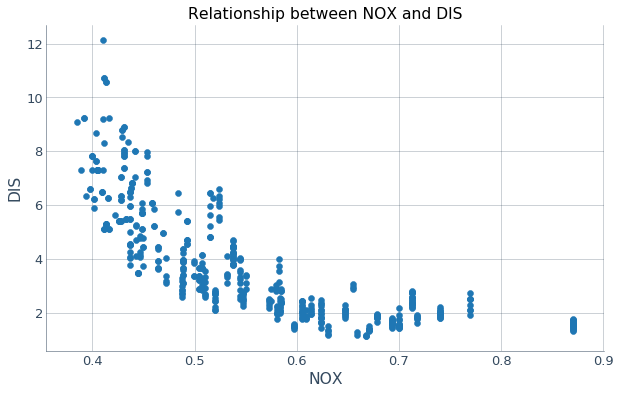

In [78]:
# Check to see if NOX and DIS are correlated. They are. So we should not use both of them as predictors.
plt.scatter(bos.NOX, bos.DIS, label='data')
plt.xlabel("NOX")
plt.ylabel("DIS")
plt.title("Relationship between NOX and DIS")

In [79]:
# Fit a linear regression model using three independent variables
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + AGE', bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     163.1
Date:                Tue, 29 May 2018   Prob (F-statistic):          1.36e-102
Time:                        09:59:28   Log-Likelihood:                -1595.5
No. Observations:                 506   AIC:                             3203.
Df Residuals:                     500   BIC:                             3228.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1420      4.206      1.222      0.2

Text(0.5,0,'Number of Rooms')

Text(0,0.5,'Housing Price')

Text(0.5,1,'Relationship between RM and Price')

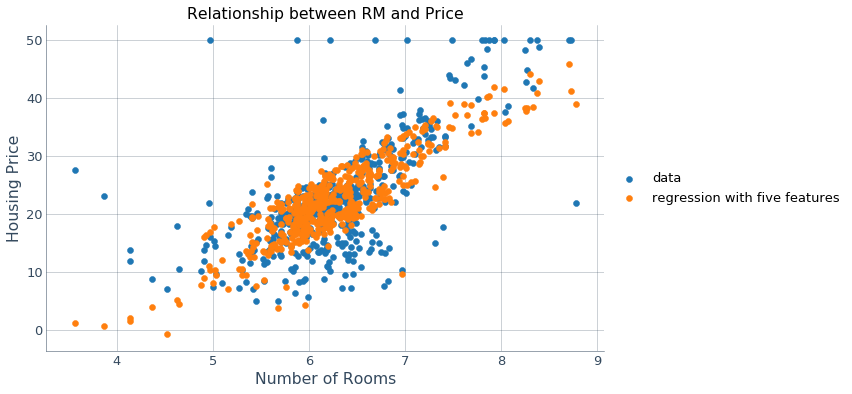

In [80]:
# look at the scatter plots
plt.scatter(bos.RM, bos.PRICE, label='data')
plt.scatter(bos.RM, m4.fittedvalues, label='regression with five features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5,0,'DIS')

Text(0,0.5,'Housing Price')

Text(0.5,1,'Relationship between DIS and Price')

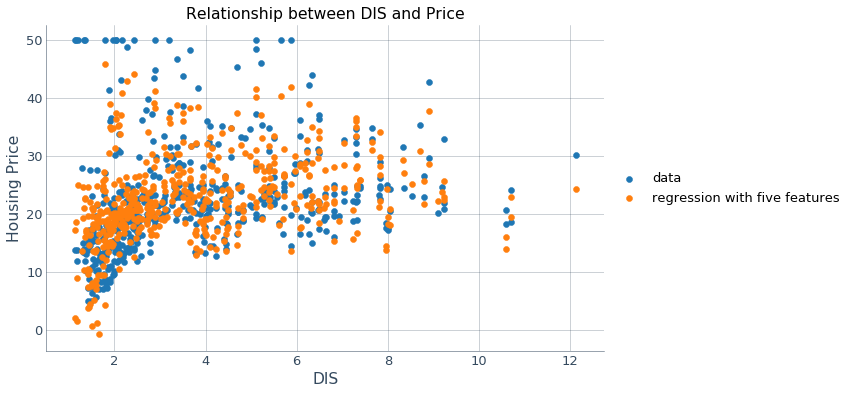

In [81]:
# look at the scatter plots
plt.scatter(bos.DIS, bos.PRICE, label='data')
plt.scatter(bos.DIS, m4.fittedvalues, label='regression with five features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("DIS")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

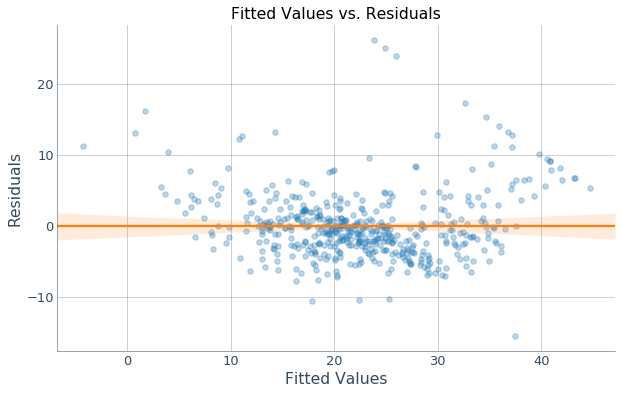

In [82]:
# fitted values v. residuals

m_5 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m_5.summary()

# reg plot: fitted values vs residuals
sns.regplot(x=m.fittedvalues, y=m.resid, data=bos, fit_reg = True,
            scatter_kws={'color': 'C0', 'alpha':0.3, 's':30}, 
            line_kws={'color': 'C1'})

_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')
_ = plt.title('Fitted Values vs. Residuals');

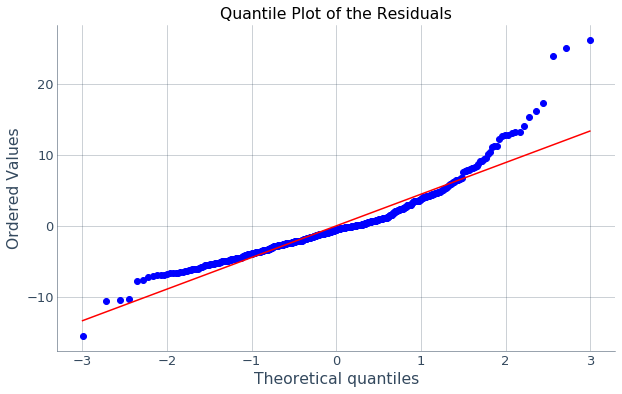

In [83]:
import pylab
# quantile plot of residuals
stats.probplot(m.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals');

In [84]:
# ferret out large residuals
bos['FITTED'] = m.fittedvalues
bos['RESIDUALS'] = m.resid

large_residuals = bos[bos.RESIDUALS > 20]
bos.describe()
large_residuals

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,FITTED,RESIDUALS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806,22.532806,9.362735e-15
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,7.914896,7.914896,4.684137e+00
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,-4.283009,-4.283009,-1.557946e+01
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.447270,17.447270,-2.725635e+00
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,22.120625,22.120625,-5.164656e-01
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,27.412587,27.412587,1.783116e+00
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,44.673399,44.673399,2.618865e+01


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,FITTED,RESIDUALS
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,23.811350,23.811350,26.188650
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,24.946041,24.946041,25.053959
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,26.002597,26.002597,23.997403


__Outliers__: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

__Leverage__: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

__Influence__: An observation is said to be influential of removing the observation substantially changes the estimate of the coefficients.  Influence can be thought of as the product of leverage and outlierness.

In [85]:
# this is for high prices, not outliers...
mean = np.mean(bos.PRICE)
std = np.std(bos.PRICE)

upper_outlier = mean + 2*std

print('mean = {}'.format(mean))
print('std = {}'.format(std))
print('upper outlier = {}'.format(upper_outlier))

upper_limit = np.mean(bos.PRICE) + 2*np.std(bos.PRICE)
upper_limit

outliers = []

for x in m.resid:
    if x > 20:
        outliers.append(x)

outliers

mean = 22.532806324110698
std = 9.188011545278206
upper outlier = 40.90882941466711


40.90882941466711

[26.18865013060556, 25.05395897604472, 23.997402755798507]

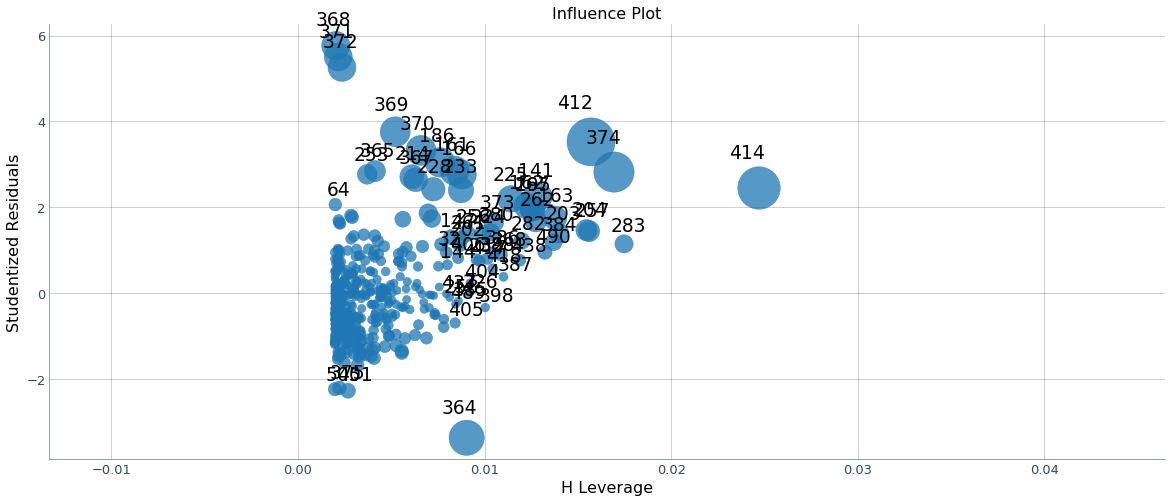

In [86]:
# leverage plot
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize = (20,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")

In [87]:
# leverage plot with outliers and high leverage points removed

# 1 5

Text(0.5,0,'Fitted Values')

Text(0,0.5,'Residuals')

Text(0.5,1,'Fitted Values vs Residuals')

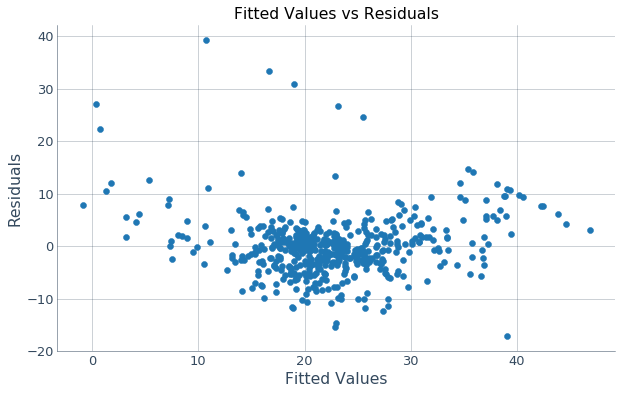

In [89]:
# Your turn.
plt.scatter(mult_reg.fittedvalues, mult_reg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')

The plot reflects what was observed in earlier scatterplots of actual vs predicted price. There is no pattern to the residuals in the middle range of predicted prices, but as prices get very low or very high, the model underestimates prices and the residuals get larger. This violates the assumption of normally distributed errors as the residuals are heteroskedastic.

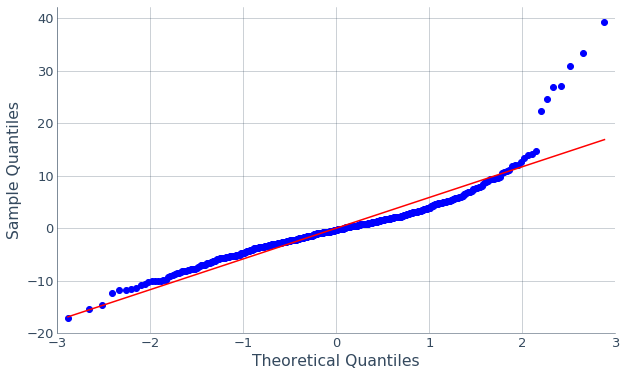

Text(0.5,22.2,'Normal-distribution quantiles')

Text(22.2,0.5,'Residual quantiles')

Text(0.5,1,'Quantile Plot of Residuals')

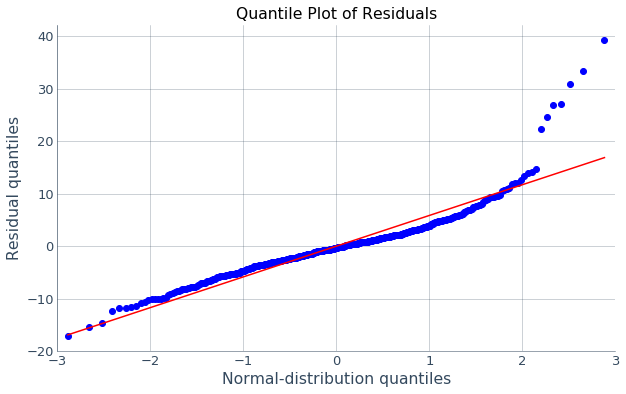

In [90]:
sm.qqplot(mult_reg.resid, line = 's')
plt.xlabel('Normal-distribution quantiles')
plt.ylabel('Residual quantiles')
plt.title('Quantile Plot of Residuals')
plt.show()

Since the instructions don't specify which theoretical distribution to make a quantile plot of, I assumed it referred to a normal distribution.

This shows that the residuals are fairly normally-distributed within 2 standard deviations, but beyond that have a strong positive skew and do not align with a normal distribution.

#### Plot Comparison

The residual-fitted plot provides an understanding of how the residuals very with respect to the predicted values. This is useful for understanding where and how severely the residuals change with respect to the predictions. It also provides an easy way to see if there is a relationship between the residuals and the predictions as there is in this case.

The quantile plot however shows how residuals very with respect to a target distribution. Like the risidual-fitted plot, it allows one to see how much the residuals differ from the predictions. It's worth noting that in the above plot I chose not to use the `fit=True` argument, so the residuals are in units of price and the fit line has been standardized to show where the residuals are with respect to the normal distribution. This I feel provides slightly more information than seeing where the standard deviations of the residuals lie with respect to the normal distribution.

The residual-fitted plot does not allow one to see how residuals resemble or fail to resemble a target distribution. The quantile plot does not show what predictions have the largest residuals and if there is a pattern to it.

#### Outlier Interpretation

As I mentioned responding to the residual-fitted plot, there are outliers at high and low prediction prices. These outliers are also shown on the quantile plot where the residual distribuation has many more points over 2 standard deviations than the normal distribution. This is because the model is severely underestimating housing values at the large and small ends of the distribution (the intercept of this model is -3, which is a dead giveaway that the model was going to create some funky predictions).

Something like this makes sense given the data. Housing prices have asymptotes. There are no free houses, and there are no trillion dollar houses. So a linear regression, no matter how good the predictors, will always fail as it approaches the asymptotes of price.

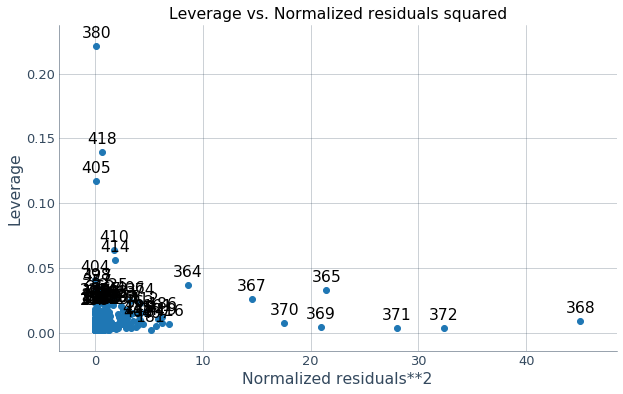

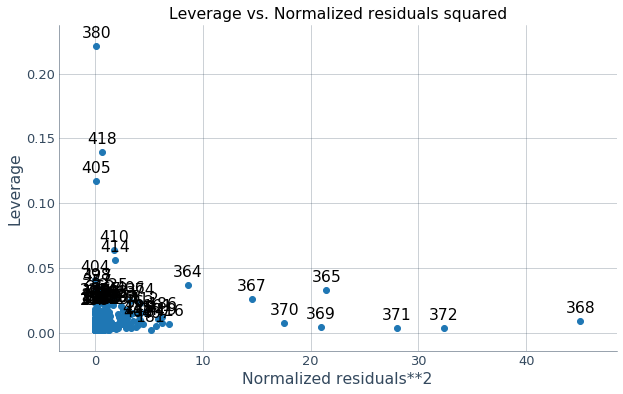

In [91]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(mult_reg)
plt.show()

The leverage points and outliers are closely related. High leverage points are points heavily influencing the coefficient of a predictor variable. That effect on the predictor variable can cause other points that might otherwise be better predicted by the model to have larger residuals.

The most likely cause of this is the per capita crime rate feature. The distribution of crime rate was such that most values were between 0 and 10, with some outliers further out. These crime rate outliers I believe make up the high leverage and residual outlier points. The residual outliers are likely crime outliers that didn't correspond to the high leverage points.

That's all very convoluted. Put more understandably - say it's just a model of price ~ crim. And say for most observations, price = 40 - crime. But there are some outliers where price = 40 + crime (yes that's illogical but this example is ignoring the other features so there could be points like that). There is also a set of outliers where price = 40 - 2\*crime. If the model cares more about that first set of outliers, and compensates to become price = 40 - $\frac {4}{5}$crime then suddenly the second group of outliers gets even more outlier'y in the model.

In [92]:
# Dropping high leverage points AND residual outliers
nasty_points = [380, 418, 405, 367, 370, 365, 369, 371, 372, 368]
better_boston = bos.loc[bos.index.difference(nasty_points)].copy()

In [93]:
better_boston.shape

(496, 17)

In [94]:
better_reg = ols("PRICE ~ CRIM + RM + PTRATIO", better_boston).fit()
better_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 29 May 2018   Prob (F-statistic):          9.12e-134
Time:                        10:00:50   Log-Likelihood:                -1469.9
No. Observations:                 496   AIC:                             2948.
Df Residuals:                     492   BIC:                             2965.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9837      3.301     -1.813      0.070     -12.469       0.501
CRIM          -0.2507      0.035     -7.106      0.000      -0.320      -0.181
RM             7.9214      0.337     23.514      0.000       7.260       8.583
PTRATIO       -1.1285      0.108    -10.491      0.000      -1.340      -0.917
==============================================================================
Omnibus:                       14.891   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.604
Skew:                           0.125   Prob(JB):                     6.15e-07
Kurtosis:                       4.150   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The residual free model is showing a higher $R^2$ and F-statistic, so it is better explaining the variance. More weight is being given to RM and PTRATIO than before and slightly less to CRIM. This lines up with my proposed explanation.

Time to build the resid-fitted plot and quantile plot again.

Text(0.5,0,'Fitted Values')

Text(0,0.5,'Residuals')

Text(0.5,1,'Fitted Values vs Residuals')

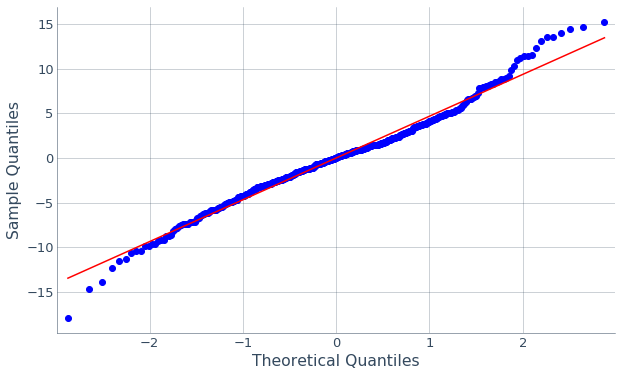

Text(0.5,22.2,'Normal-distribution quantiles')

Text(22.2,0.5,'Residual quantiles')

Text(0.5,1,'Quantile Plot of Residuals')

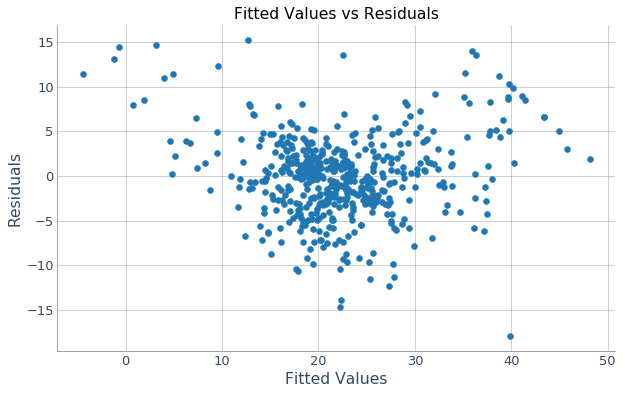

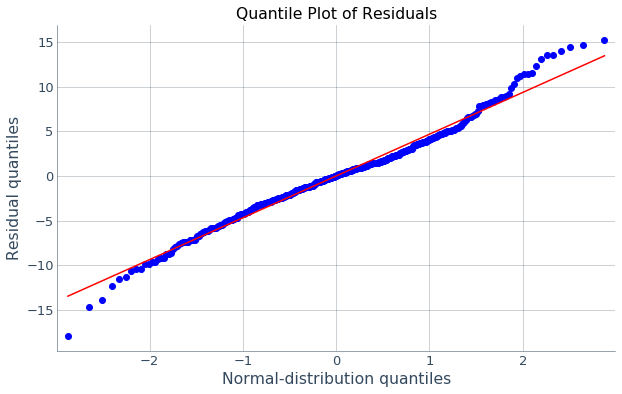

In [95]:
plt.scatter(better_reg.fittedvalues, better_reg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')

sm.qqplot(better_reg.resid, line = 's')
plt.xlabel('Normal-distribution quantiles')
plt.ylabel('Residual quantiles')
plt.title('Quantile Plot of Residuals')
plt.show()

The plots show that the regression has improved, but is still not ideal. The quantile plot still diverges from the normal distribution, but this time the residuals are on a smaller scale and don't diverge nearly as strongly. They also diverge more evenly at large positive and negative sd's.

The residual-fitted plot (on a smaller y-range than previously) shows that all the points are closer to y=0, and while the variance still changes at high and low prices, it is not as severe as before.

# 2 5

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

I use the model predicting housing price based on pupil-teacher ratio:

Text(0.5,1,'Fitted values vs Residuals')

Text(0.5,0,'Predicted housing price')

Text(0,0.5,'Residual')

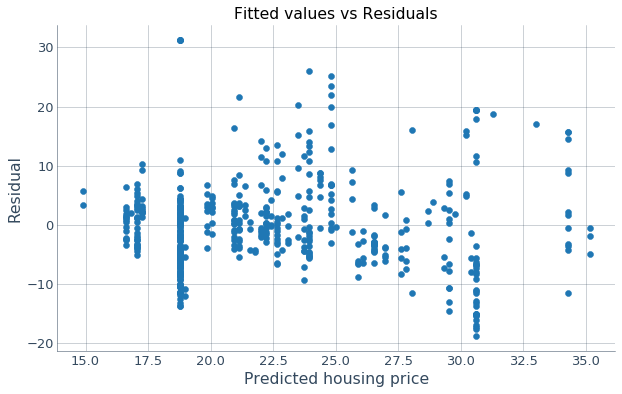

In [96]:
plt.scatter(m2.fittedvalues, m2.resid)
plt.title('Fitted values vs Residuals')
plt.xlabel('Predicted housing price')
plt.ylabel('Residual')

The residuals appear to be uncorrelated with a constant variance. The plot does not indicate a violation of regression assumptions.

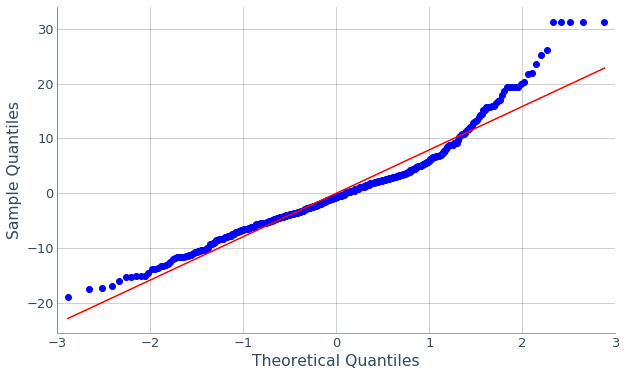

In [97]:
import statsmodels.api as sm

_ = sm.qqplot(m2.resid, line = 's')
#plt.show()

Because most of the points on the residual quantile plot lie near the line representing the normal distribution, the residuals appear to be normally distributed.

The quantile plot allows for a better comparison of how the residual distribution compares to the normal distribution. However, because the plot only shows the quantiles of the residuals, it is impossible to tell whether the residuals are uncorrelated. The residual scatterplot allows you to see if there is a pattern in the residuals.

Text(0.5,0,'Pupil-teacher ratio')

Text(0,0.5,'Median Housing Price')

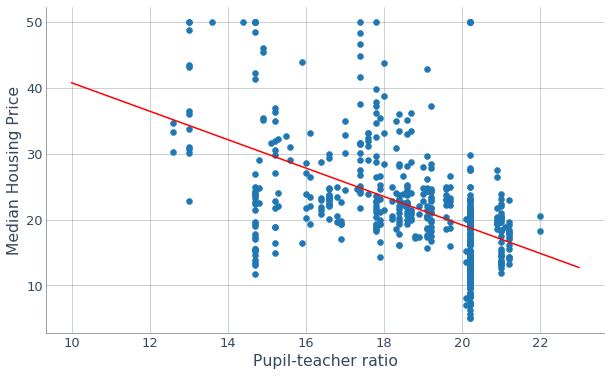

In [98]:
from statsmodels.graphics.regressionplots import plot_fit
plt.scatter(bos.PTRATIO, bos.PRICE)

x = np.arange(10, 24)
plt.plot(x, -2.1572*x + 62.3446, color = 'r')

plt.xlabel('Pupil-teacher ratio')
plt.ylabel('Median Housing Price')

This graph shows one point (which actually represents five data points with the same pupil-teacher ratio and price) with a median housing price of \$50,000, despite the model predicting a median housing price of around \$20,000. A handful of towns have a median housing price of \$50,000, and these towns appear to be more expensive than the others for reasons not captured by the model. 

Now I will show the leverage plot:

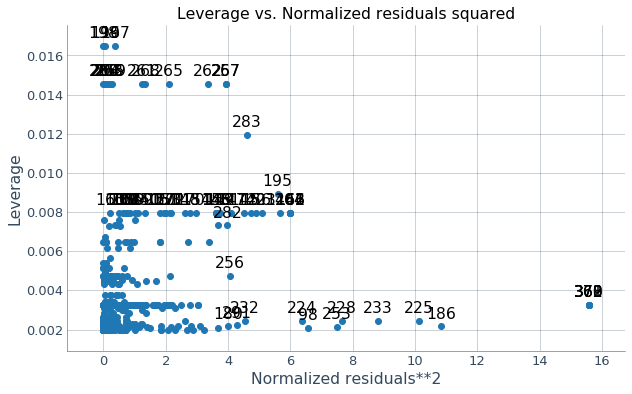

In [99]:
from statsmodels.graphics.regressionplots import *
_ = plot_leverage_resid2(m2)
_.set_size_inches(10,6)

I will zoom in on the highest-leverage values to see the labels.

(0, 0.4)

(0.014, 0.017548641448407412)

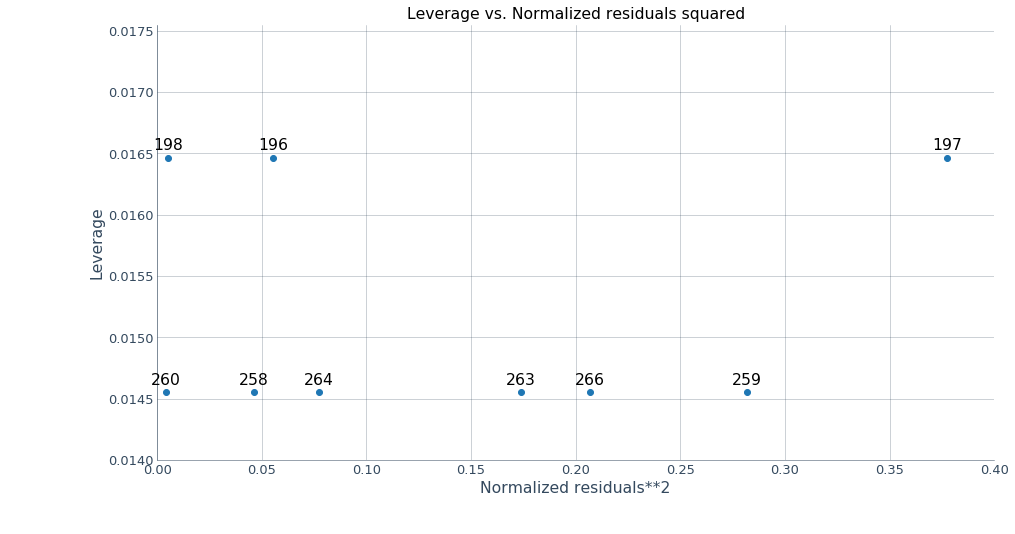

In [100]:
_ = plot_leverage_resid2(m2)
_.set_size_inches(15,8)
plt.xlim(left = 0, right = 0.4)
plt.ylim(0.014)

Next, I identify the outliers based on their residuals, and look them up in the original dataframe to confirm that these were the points I identified visually.

In [101]:
m2.resid.sort_values(ascending = False)[:5]

372    31.230314
368    31.230314
369    31.230314
371    31.230314
370    31.230314
dtype: float64

In [102]:
bos.iloc[[370, 371, 369, 368, 372]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,FITTED,RESIDUALS
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,34.611634,34.611634,15.388366
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,24.946041,24.946041,25.053959
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,32.647872,32.647872,17.352128
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,23.811350,23.811350,26.188650
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,26.002597,26.002597,23.997403


In [103]:
to_remove = [198, 196, 197, 260, 258, 264, 263, 266, 259, 368, 369, 370, 371, 372]

bos2 = bos.drop(bos.index[to_remove])

In [104]:
removed = ols('PRICE ~ PTRATIO',bos2).fit()
print(removed.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 29 May 2018   Prob (F-statistic):           3.88e-39
Time:                        10:00:51   Log-Likelihood:                -1680.2
No. Observations:                 492   AIC:                             3364.
Df Residuals:                     490   BIC:                             3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1546      3.026     21.532      0.0

In [105]:
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.61e-34
Time:                        10:00:51   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Comparing the two models, the model with the outliers and high-leverage points removed has a pupil-teacher ratio coefficient with a higher absolute value (-2.32 versus -2.15). The $R^2$ value is higher (0.295 versus 0.258), meaning that the model has higher explanatory power for the data when outliers and high-leverage points are excluded.

# 3 5


(array([  7.,  43., 206., 197.,  38.,   8.,   1.,   3.,   2.,   1.]),
 array([-2.92467466, -1.96391171, -1.00314877, -0.04238582,  0.91837713,
         1.87914008,  2.83990303,  3.80066598,  4.76142892,  5.72219187,
         6.68295482]),
 <a list of 10 Patch objects>)

Text(0,0.5,'Count')

Text(0.5,0,'Normalized residuals')

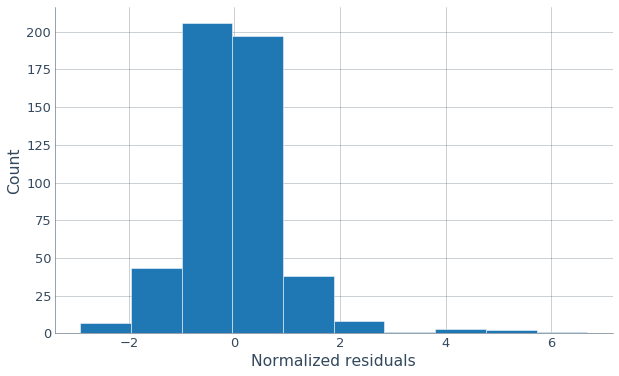

In [106]:
# Normalized residuals histogram: There are outliers
plt.hist(m3.resid_pearson)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
# http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

Text(0,0.5,'Normalized residuals')

Text(0.5,0,'Fitted Values for PRICE')

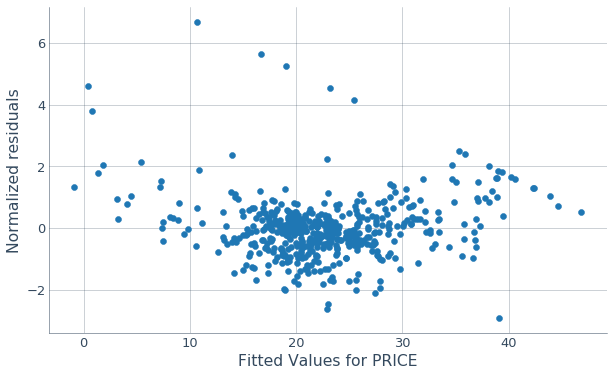

In [107]:
# fitted values versus residuals plot
plt.scatter(m3.fittedvalues, m3.resid_pearson)
plt.ylabel('Normalized residuals')
plt.xlabel('Fitted Values for PRICE')

Text(0.5,0,'Actual PRICE')

Text(0,0.5,'Normalized residuals')

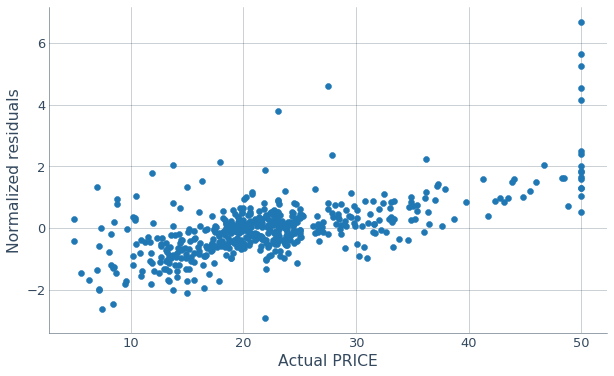

In [108]:
# actual prices versus residuals plot
plt.scatter(bos.PRICE, m3.resid_pearson)
plt.xlabel('Actual PRICE')
plt.ylabel('Normalized residuals')

([<matplotlib.axis.XTick at 0x1c18fc5860>],
 <a list of 1 Text xticklabel objects>)

Text(0,0.5,'Normalized residuals')

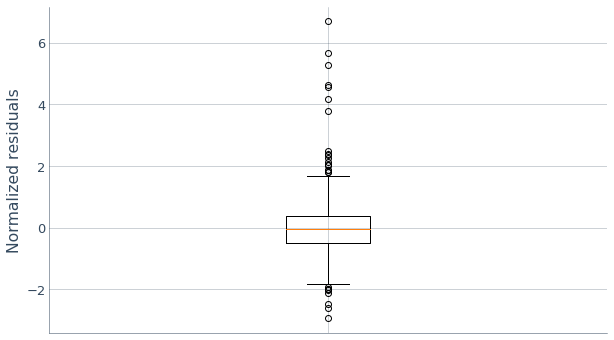

In [109]:
# Incomplete quantile plot 
_ = plt.boxplot(m3.resid_pearson, showfliers=True)
# When sns is imported fliers do not show up even when showfliers is specificly enabled.
plt.xticks([1],[''])
plt.ylabel('Normalized residuals')

Text(0,0.5,'Normalized residuals')

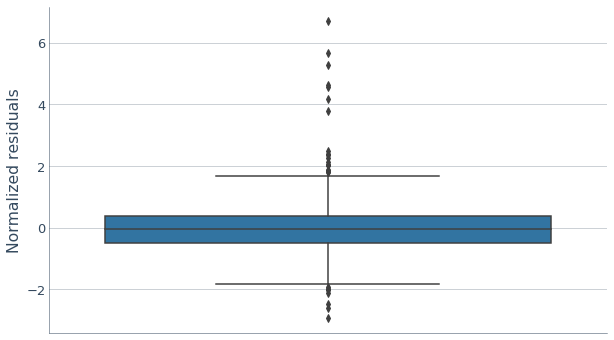

In [110]:
# Quantile plot: There are outliers
sns.boxplot(m3.resid_pearson, orient='v')
plt.ylabel('Normalized residuals')

In [111]:
# outliers: Highly priced houses 
print (bos[m3.resid_pearson>3])

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  PTRATIO       B  LSTAT  PRICE  PRED_PRICE     FITTED  RESIDUALS
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0     20.2  354.70   7.12   27.5   14.291726  14.291726  13.208274
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0     20.2  131.42  13.33   23.1   10.828258  10.828258  12.271742
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0     20.2  375.52   3.26   50.0   23.811350  23.811350  26.188650
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0     20.2  375.33   3.73   50.0   32.647872  32.647872  17.352128
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0     20.2  392.05   2.96   50.0   34.611634  34.611634  15.388366
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0     20.2  366.15   9.53   50.0   24.946041  24.946041  25.053959
372   8.26725  0.0   18.1  

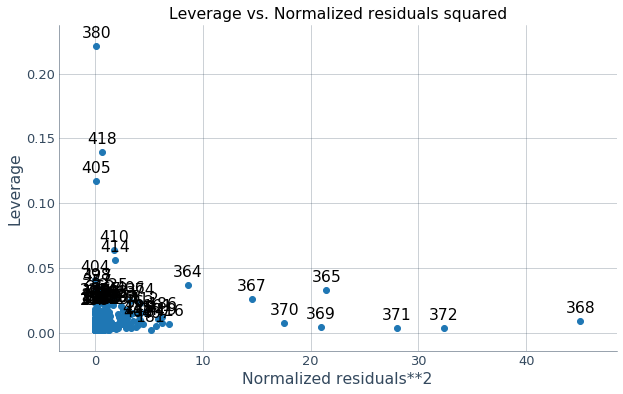

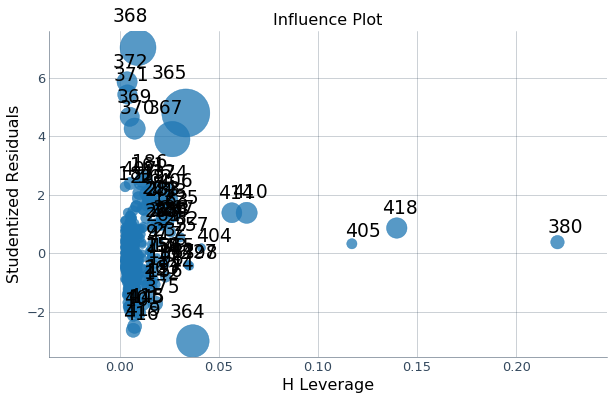

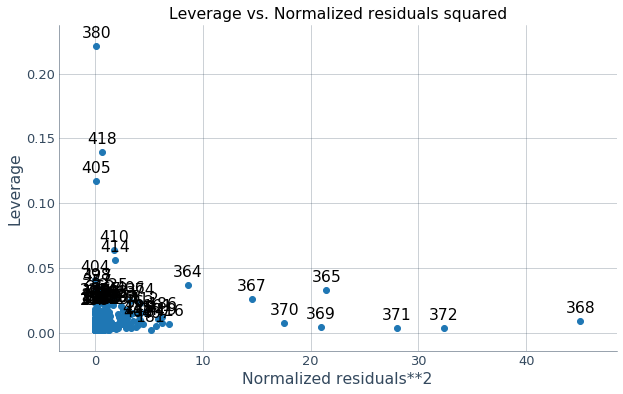

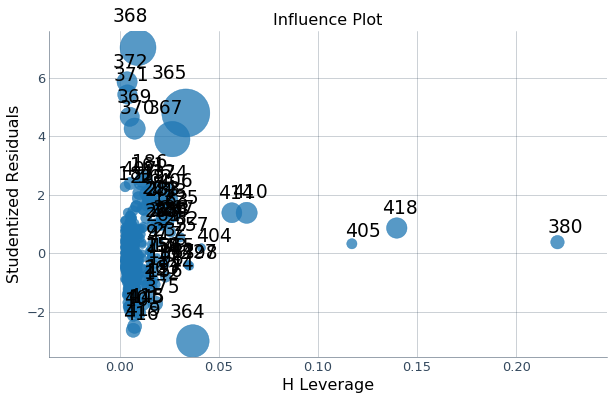

In [112]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. ### HOW to identify?
# Write a story explaining possible reasons for the high leverage points.
# http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m3)
influence_plot(m3)

In [113]:
# Remove the outliers and high leverage points from your model and run the regression again. 
# How do the results change? R2 has increased from 0.59 to 0.71.
bos_filtered = bos.drop(bos.index[[365, 367, 368, 369, 370, 371, 372, 405, 418, 380]])

m5 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_filtered).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 29 May 2018   Prob (F-statistic):          9.12e-134
Time:                        10:00:53   Log-Likelihood:                -1469.9
No. Observations:                 496   AIC:                             2948.
Df Residuals:                     492   BIC:                             2965.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9837      3.301     -1.813      0.0

# Regression With Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

%matplotlib inline
sns.set(style="white", font_scale=0.9)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [115]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED_PRICE,FITTED,RESIDUALS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.008213,30.008213,-6.008213
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.029861,25.029861,-3.429861
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.570232,30.570232,4.129768
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.608141,28.608141,4.791859
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.942882,27.942882,8.257118


In [116]:
bos.drop('PRICE', axis=1).corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED_PRICE,FITTED,RESIDUALS
CRIM,1.000000e+00,-1.994580e-01,4.044707e-01,-5.529526e-02,4.175214e-01,-2.199398e-01,3.507837e-01,-3.779036e-01,6.220289e-01,5.795643e-01,2.882502e-01,-3.773646e-01,4.522203e-01,-4.483362e-01,-4.483362e-01,8.501105e-16
ZN,-1.994580e-01,1.000000e+00,-5.338282e-01,-4.269672e-02,-5.166037e-01,3.119906e-01,-5.695373e-01,6.644082e-01,-3.119478e-01,-3.145633e-01,-3.916785e-01,1.755203e-01,-4.129946e-01,4.188372e-01,4.188372e-01,1.353159e-14
INDUS,4.044707e-01,-5.338282e-01,1.000000e+00,6.293803e-02,7.636514e-01,-3.916759e-01,6.447785e-01,-7.080270e-01,5.951293e-01,7.207602e-01,3.832476e-01,-3.569765e-01,6.037997e-01,-5.620883e-01,-5.620883e-01,-8.468516e-15
CHAS,-5.529526e-02,-4.269672e-02,6.293803e-02,1.000000e+00,9.120281e-02,9.125123e-02,8.651777e-02,-9.917578e-02,-7.368241e-03,-3.558652e-02,-1.215152e-01,4.878848e-02,-5.392930e-02,2.036522e-01,2.036522e-01,-6.814486e-15
NOX,4.175214e-01,-5.166037e-01,7.636514e-01,9.120281e-02,1.000000e+00,-3.021882e-01,7.314701e-01,-7.692301e-01,6.114406e-01,6.680232e-01,1.889327e-01,-3.800506e-01,5.908789e-01,-4.965464e-01,-4.965464e-01,-8.593364e-15
RM,-2.199398e-01,3.119906e-01,-3.916759e-01,9.125123e-02,-3.021882e-01,1.000000e+00,-2.402649e-01,2.052462e-01,-2.098467e-01,-2.920478e-01,-3.555015e-01,1.280686e-01,-6.138083e-01,8.080078e-01,8.080078e-01,1.640585e-15
AGE,3.507837e-01,-5.695373e-01,6.447785e-01,8.651777e-02,7.314701e-01,-2.402649e-01,1.000000e+00,-7.478805e-01,4.560225e-01,5.064556e-01,2.615150e-01,-2.735340e-01,6.023385e-01,-4.380210e-01,-4.380210e-01,-1.575734e-14
DIS,-3.779036e-01,6.644082e-01,-7.080270e-01,-9.917578e-02,-7.692301e-01,2.052462e-01,-7.478805e-01,1.000000e+00,-4.945879e-01,-5.344316e-01,-2.324705e-01,2.915117e-01,-4.969958e-01,2.904170e-01,2.904170e-01,1.315123e-14
RAD,6.220289e-01,-3.119478e-01,5.951293e-01,-7.368241e-03,6.114406e-01,-2.098467e-01,4.560225e-01,-4.945879e-01,1.000000e+00,9.102282e-01,4.647412e-01,-4.444128e-01,4.886763e-01,-4.434494e-01,-4.434494e-01,-6.209552e-17
TAX,5.795643e-01,-3.145633e-01,7.207602e-01,-3.558652e-02,6.680232e-01,-2.920478e-01,5.064556e-01,-5.344316e-01,9.102282e-01,1.000000e+00,4.608530e-01,-4.418080e-01,5.439934e-01,-5.444384e-01,-5.444384e-01,4.197604e-16


<Figure size 432x360 with 0 Axes>

Text(0.5,1,'Heatmap of Correlation Matrix')

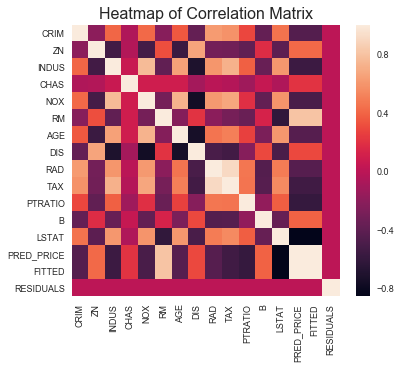

In [117]:
corr = bos.drop(columns='PRICE').corr() # TAX and RAD are highly correlated

plt.figure(figsize=(6,5))
sns.heatmap(corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix', fontsize= 16)

plt.show()

In [118]:
# F-test >> all features are important

X = bos.drop('PRICE', axis=1)
y = bos['PRICE']
(F_val, p_val) = f_regression(X,y)
F_table = pd.DataFrame(data=[F_val, p_val], columns=X.columns, index=['F_vals','p_vals'])
F_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRED_PRICE,FITTED,RESIDUALS
F_vals,8.815124e+01,7.525764e+01,1.539549e+02,15.971512,1.125915e+02,4.718467e+02,8.347746e+01,3.357957e+01,8.591428e+01,1.417614e+02,1.751055e+02,6.305423e+01,6.016179e+02,1.439003e+03,1.439003e+03,1.765222e+02
p_vals,2.083550e-19,5.713584e-17,4.900260e-31,0.000074,7.065042e-24,2.487229e-74,1.569982e-18,1.206612e-08,5.465933e-19,5.637734e-29,1.609509e-34,1.318113e-14,5.081103e-88,8.562118e-150,8.562118e-150,9.491882e-35


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

param_grid = {"n_estimators": [100, 200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 3, 5, 10],
    "bootstrap": [True, False]}

RF_model = RandomForestRegressor(random_state=0)
RF_CV = GridSearchCV(estimator=RF_model, param_grid=param_grid, n_jobs=-1, cv=5)
RF_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_depth': [3, None], 'max_features': [1, 3, 5, 10], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 5, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
print('R-square (mean cross validator score for the best parameters):', RF_CV.best_score_) # R2, coefficient of determination
print(RF_CV.best_params_)

R-square (mean cross validator score for the best parameters): 0.9430702836557336
{'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [121]:
RF_CV.score(X_train, y_train)

0.991749422675713

In [122]:
RF_Opt = RandomForestRegressor(random_state=0, bootstrap= False, max_depth= None, max_features= 3, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200)

In [123]:
RF_Opt.fit(X_train, y_train)
feature_importance = pd.DataFrame(data=RF_Opt.feature_importances_, index=X_train.columns.values, columns=['values'])
feature_importance.sort_values(['values'], ascending=False, inplace=True)
feature_importance.transpose()

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

,PRED_PRICE,FITTED,LSTAT,RM,RESIDUALS,PTRATIO,INDUS,CRIM,NOX,TAX,DIS,AGE,B,ZN,RAD,CHAS
values,0.209996,0.186288,0.147875,0.118842,0.07935,0.045914,0.044537,0.042181,0.034447,0.023596,0.023212,0.017599,0.011111,0.006879,0.006267,0.001906


In [124]:
feature_importance

,values
PRED_PRICE,0.209996
FITTED,0.186288
LSTAT,0.147875
RM,0.118842
RESIDUALS,0.079350
PTRATIO,0.045914
INDUS,0.044537
CRIM,0.042181
NOX,0.034447
TAX,0.023596


In [125]:
feature_importance.reset_index(level=0, inplace=True)

In [126]:
feature_importance

,index,values
0,PRED_PRICE,0.209996
1,FITTED,0.186288
2,LSTAT,0.147875
3,RM,0.118842
4,RESIDUALS,0.079350
5,PTRATIO,0.045914
6,INDUS,0.044537
7,CRIM,0.042181
8,NOX,0.034447
9,TAX,0.023596


In [127]:
# feature importance sums up to 1
feature_importance['values'].sum()

1.0000000000000002

<Figure size 864x360 with 0 Axes>

Text(0.5,0,'Features')

Text(0,0.5,'Importance')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text yticklabel objects>)

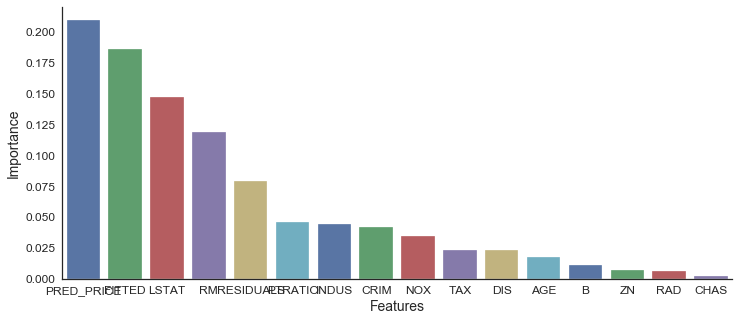

In [128]:
plt.figure(figsize=(12,5))
sns.barplot(x='index', y='values', data=feature_importance, palette='deep')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0.5,0,'Actual Price')

Text(0,0.5,'Model Prediction')

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

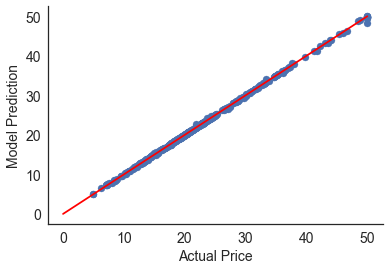

In [129]:
# Train dataset
y_pred_train = RF_Opt.predict(X_train)
plt.scatter(x=y_train, y=y_pred_train)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Model Prediction', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,50],[0,50], color='red')
plt.show()

In [130]:
print('R-square:', RF_Opt.score(X_train, y_train))

R-square: 0.9996858342209753


Text(0.5,0,'Actual Price')

Text(0,0.5,'Model Prediction')

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 <a list of 11 Text yticklabel objects>)

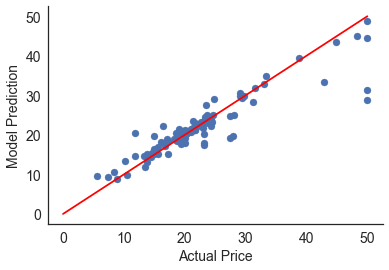

In [131]:
# Test dataset
y_pred_test = RF_Opt.predict(X_test)
plt.scatter(x=y_test, y=y_pred_test)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Model Prediction', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,50],[0,50], color='red')
plt.show()

In [132]:
print('R-square:', RF_Opt.score(X_test, y_test))

R-square: 0.8253083935219817


Text(0.5,0,'Actual Price')

Text(0,0.5,'Model Prediction')

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

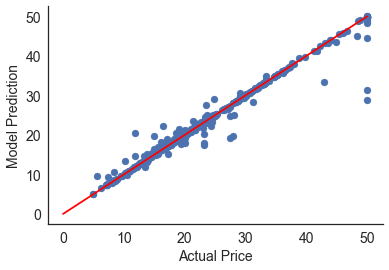

In [133]:
# Complete dataset
y_pred = RF_Opt.predict(X)
plt.scatter(x=y, y=y_pred)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Model Prediction', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,50],[0,50], color='red')
plt.show()

In [134]:
print('R-square:', RF_Opt.score(X, y))

R-square: 0.965780204182371
